In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline

In [81]:
data = pd.read_csv('Data.csv', names = ['Frequency', 'AngleOfAttack', 'ChordLength', 'Velocity', 'thickness', 'soundScale'])

In [82]:
data.head()

,Frequency,AngleOfAttack,ChordLength,Velocity,thickness,soundScale
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency        1503 non-null int64
AngleOfAttack    1503 non-null float64
ChordLength      1503 non-null float64
Velocity         1503 non-null float64
thickness        1503 non-null float64
soundScale       1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [84]:
data.describe()

,Frequency,AngleOfAttack,ChordLength,Velocity,thickness,soundScale
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


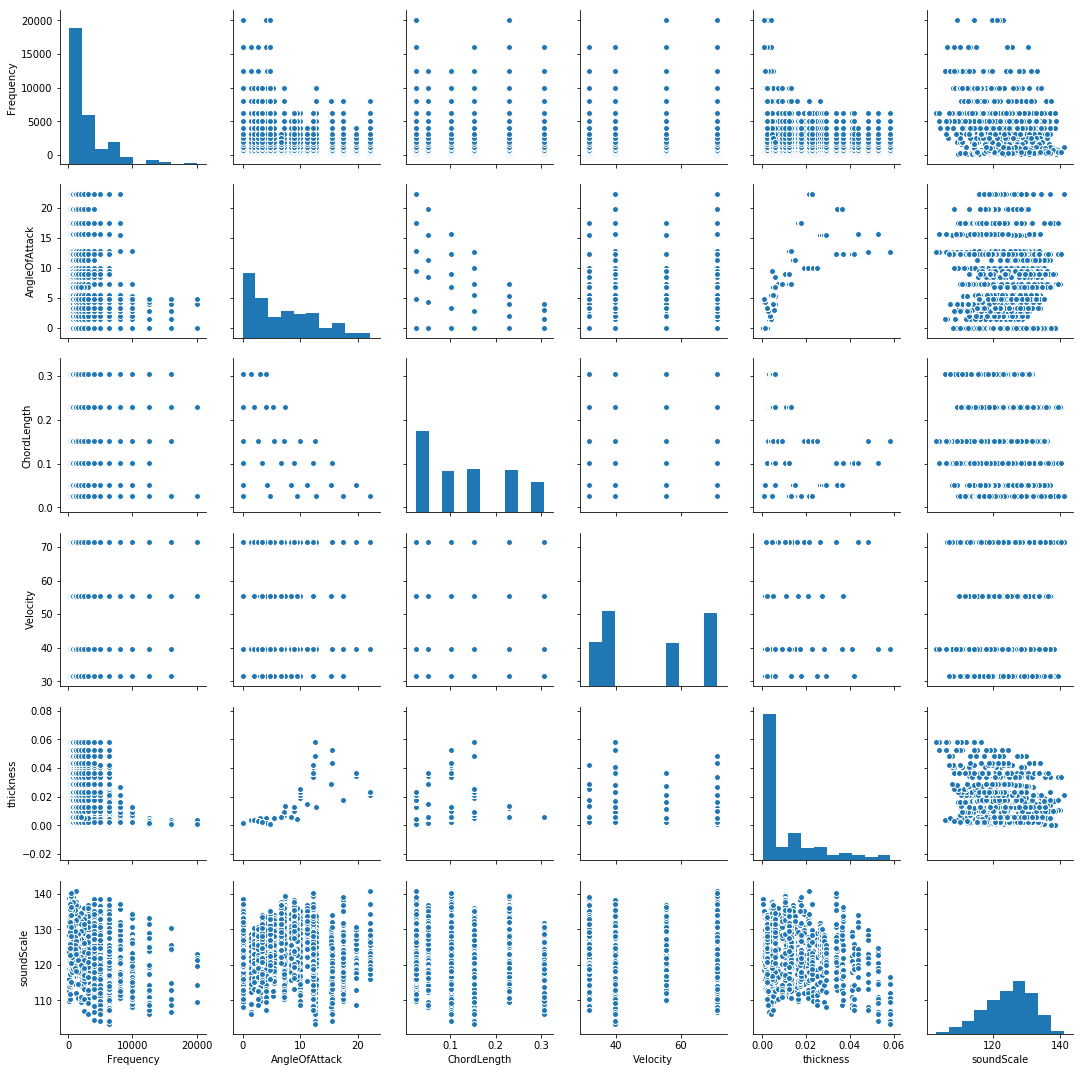

In [85]:
sns.pairplot(data)

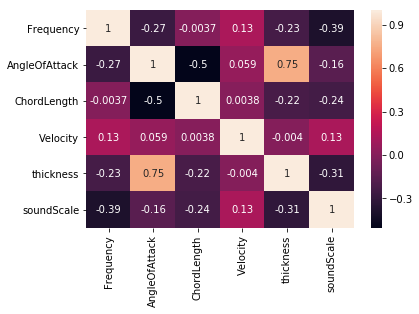

In [86]:
sns.heatmap(data.corr(),annot=True)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr = LinearRegression()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X=data.drop("soundScale",axis=1)
y=data["soundScale"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
predictions = lr.predict(X_test)

In [93]:
y_test.tail()

412     128.444
1039    134.996
1294    131.074
485     124.403
729     131.060
Name: soundScale, dtype: float64

In [94]:
for i in predictions[-5:]:
    print(i)

124.18795130187743
128.70532492421702
133.2581977136332
130.0826830771736
135.21422067794285


In [95]:
print(mean_absolute_error(y_test,predictions))

3.510346177232778


In [96]:
print(mean_squared_error(y_test,predictions))

21.213057157693157


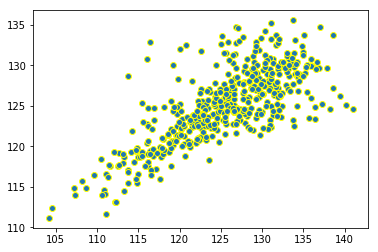

In [97]:
plt.scatter(y_test,predictions,edgecolors='yellow')

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
predictions=regressor.predict(X_test)

In [72]:
predictions[:5]

array([131.21188   , 132.88613   , 132.45919   , 128.84801333,
       124.86340333])

In [74]:
y_test.head()

1051    132.588
1286    133.153
1272    133.261
778     129.848
1236    121.306
Name: soundScale, dtype: float64

In [75]:
print(mean_absolute_error(y_test,predictions))

1.3600949741315227


In [76]:
print(mean_squared_error(y_test,predictions))

3.793678672560187


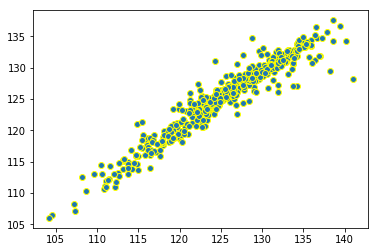

In [78]:
plt.scatter(y_test,predictions,edgecolors='yellow')

In [98]:
regressor.score(X_train,y_train)

0.9903585778902546

In [99]:
predXtrain=regressor.predict(X_train)

In [105]:
predXtrain[:10]

array([118.64458333, 128.91564667, 135.18545667, 133.46674   ,
       122.01698   , 123.08254667, 119.12182333, 126.58525   ,
       128.53409333, 120.00413333])

In [106]:
y_train.head(10)

510     117.957
100     129.494
1054    135.248
1055    132.898
268     122.232
1213    120.657
956     118.634
1158    126.746
34      128.629
339     119.649
Name: soundScale, dtype: float64

In [107]:
regressor.score(X_test,y_test)

0.9186739196883991